In [5]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 

In [6]:
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [7]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

KeyboardInterrupt: 

In [ ]:
len(reviews)

3500

In [ ]:
len(country)

3500

In [ ]:
stars = stars[:3500]
#create  a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | You may never see your ref...,\n\t\t\t\t\t\t\t\t\t\t\t\t5,22nd August 2024,United States
1,Not Verified | Cargo service: that's how I fel...,1,21st August 2024,United States
2,✅ Trip Verified | Inefficient and slow airport...,5,21st August 2024,United Kingdom
3,Not Verified | The customer service is one of...,4,18th August 2024,United States
4,"Not Verified | Before my flight, I was forced ...",2,15th August 2024,United Kingdom


In [ ]:
df.shape


(3500, 4)

In [ ]:
#Export the data into a csv format
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
cwd = os.getcwd()

df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | You may never see your ref...,5.0,22nd August 2024,United States
1,Not Verified | Cargo service: that's how I fel...,1.0,21st August 2024,United States
2,✅ Trip Verified | Inefficient and slow airport...,5.0,21st August 2024,United Kingdom
3,Not Verified | The customer service is one of...,4.0,18th August 2024,United States
4,"Not Verified | Before my flight, I was forced ...",2.0,15th August 2024,United Kingdom


In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1       False
2        True
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#create an empty list to collect cleaned data corpus
corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [ ]:
df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | You may never see your ref...,5.0,22nd August 2024,United States,True,may never see refund cancelled return flight s...
1,Not Verified | Cargo service: that's how I fel...,1.0,21st August 2024,United States,False,verified cargo service felt upper deck suppose...
2,✅ Trip Verified | Inefficient and slow airport...,5.0,21st August 2024,United Kingdom,True,inefficient slow airport operation resting lau...
3,Not Verified | The customer service is one of...,4.0,18th August 2024,United States,False,verified customer service one worst ever seen ...
4,"Not Verified | Before my flight, I was forced ...",2.0,15th August 2024,United Kingdom,False,verified flight forced ground staff check new ...


In [ ]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [ ]:

df.date = pd.to_datetime(df.date, format='mixed')

In [ ]:
df.date.head()

0   2024-08-22
1   2024-08-21
2   2024-08-21
3   2024-08-18
4   2024-08-15
Name: date, dtype: datetime64[ns]

In [ ]:
df.stars.unique()

array([ 5.,  1.,  4.,  2.,  8.,  3., 10.,  6.,  9.,  7., nan])

In [ ]:
#df.stars = df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
df.stars.value_counts()

stars
1.0     861
2.0     407
3.0     401
8.0     341
10.0    284
7.0     274
9.0     272
5.0     246
4.0     238
6.0     173
Name: count, dtype: int64

In [ ]:
df.isnull().value_counts()


reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3496
         True   False  False    False     False        3
         False  False  True     False     False        1
Name: count, dtype: int64

In [ ]:
df.country.isnull().value_counts()

country
False    3499
True        1
Name: count, dtype: int64

In [ ]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [ ]:
df.shape

(3499, 6)

In [ ]:
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | You may never see your ref...,5.0,2024-08-22,United States,True,may never see refund cancelled return flight s...
1,Not Verified | Cargo service: that's how I fel...,1.0,2024-08-21,United States,False,verified cargo service felt upper deck suppose...
2,✅ Trip Verified | Inefficient and slow airport...,5.0,2024-08-21,United Kingdom,True,inefficient slow airport operation resting lau...
3,Not Verified | The customer service is one of...,4.0,2024-08-18,United States,False,verified customer service one worst ever seen ...
4,"Not Verified | Before my flight, I was forced ...",2.0,2024-08-15,United Kingdom,False,verified flight forced ground staff check new ...
...,...,...,...,...,...,...
3494,BA176 JFK to Heathrow 13 October 2014. The out...,8.0,2014-10-22,United Kingdom,False,ba jfk heathrow october outward flight awful r...
3495,Very impressed with Premium Economy on BA Sydn...,3.0,2014-10-22,Australia,False,impressed premium economy ba sydney heathrow r...
3496,A319 Barcelona to Heathrow Business no announc...,7.0,2014-10-22,United Kingdom,False,barcelona heathrow business announcement board...
3497,BA213 Heathrow to Boston 29/09/14 B747. There ...,1.0,2014-10-22,United Kingdom,False,ba heathrow boston b nothing commend flight be...


In [ ]:
df.to_csv(cwd + "/cleaned-BA-reviews.csv")

In [8]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [9]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [10]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | You may never see your ref...,5.0,2024-08-22,United States,True,may never see refund cancelled return flight s...
1,Not Verified | Cargo service: that's how I fel...,1.0,2024-08-21,United States,False,verified cargo service felt upper deck suppose...
2,✅ Trip Verified | Inefficient and slow airport...,5.0,2024-08-21,United Kingdom,True,inefficient slow airport operation resting lau...
3,Not Verified | The customer service is one of...,4.0,2024-08-18,United States,False,verified customer service one worst ever seen ...
4,"Not Verified | Before my flight, I was forced ...",2.0,2024-08-15,United Kingdom,False,verified flight forced ground staff check new ...


In [11]:
df.stars.mean()

4.5838100686498855

Text(0.5, 0.98, 'Counts for each ratings')

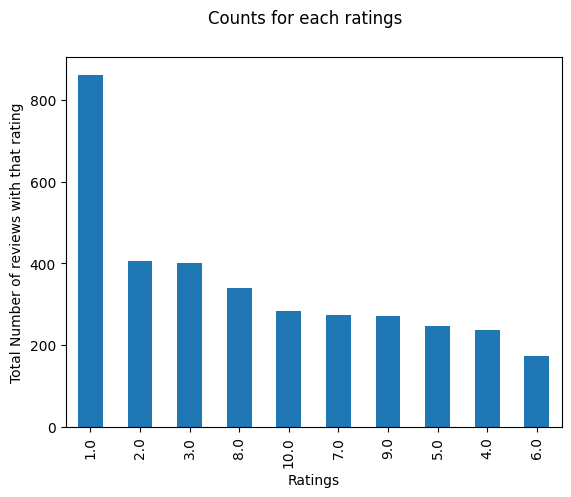

In [12]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [13]:
df.stars.value_counts()

stars
1.0     861
2.0     407
3.0     401
8.0     341
10.0    284
7.0     273
9.0     272
5.0     246
4.0     238
6.0     173
Name: count, dtype: int64

In [ ]:

df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values
#resetting index as we do not want to confuse between the index and the rating values


AttributeError: 'DataFrame' object has no attribute 'stars'

In [14]:
df_ratings = pd.DataFrame(df.stars.value_counts()).reset_index()
df_ratings.columns = ['rating', 'count']

# Calculate percentage values
pct_values = (df_ratings['count'].values / df_ratings['count'].values.sum() * 100).tolist()
pct_values = [round(x, 2) for x in pct_values]

# Add the percentage values to the DataFrame
df_ratings['pct_values'] = pct_values

# Display the resulting DataFrame
print(df_ratings)


   rating  count  pct_values
0     1.0    861       24.63
1     2.0    407       11.64
2     3.0    401       11.47
3     8.0    341        9.75
4    10.0    284        8.12
5     7.0    273        7.81
6     9.0    272        7.78
7     5.0    246        7.04
8     4.0    238        6.81
9     6.0    173        4.95


In [15]:
df_ratings = df_ratings.reset_index()
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'count':'total_counts'}, inplace=True)
df_ratings

,Stars,rating,total_counts,pct_values
0,0,1.0,861,24.63
1,1,2.0,407,11.64
2,2,3.0,401,11.47
3,3,8.0,341,9.75
4,4,10.0,284,8.12
5,5,7.0,273,7.81
6,6,9.0,272,7.78
7,7,5.0,246,7.04
8,8,4.0,238,6.81
9,9,6.0,173,4.95


C:\Users\User\AppData\Local\Temp\ipykernel_9556\2042004180.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
C:\Users\User\AppData\Local\Temp\ipykernel_9556\2042004180.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

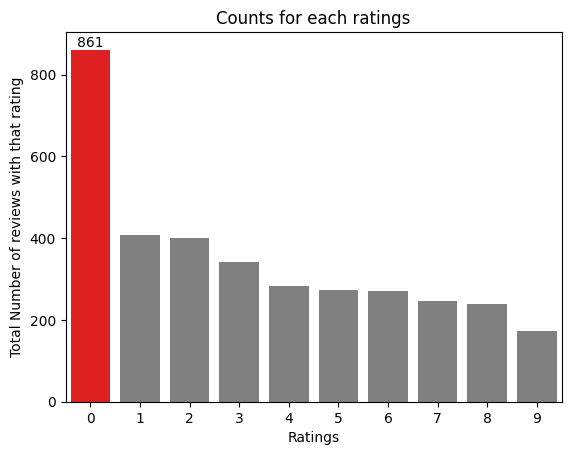

In [16]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [17]:
df_ratings

,Stars,rating,total_counts,pct_values
0,0,1.0,861,24.63
1,1,2.0,407,11.64
2,2,3.0,401,11.47
3,3,8.0,341,9.75
4,4,10.0,284,8.12
5,5,7.0,273,7.81
6,6,9.0,272,7.78
7,7,5.0,246,7.04
8,8,4.0,238,6.81
9,9,6.0,173,4.95


In [18]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)


In [ ]:
df_country_review
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

TypeError: no numeric data to plot

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
columns = ['Stars', 'rating']
df_ratings.drop(columns, inplace=True, axis=1)

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

AttributeError: 'DataFrame' object has no attribute 'total_counts'

C:\Users\User\AppData\Local\Temp\ipykernel_17432\31791435.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings['rating'], y=df_ratings['count'], palette=clrs, errwidth=0)
C:\Users\User\AppData\Local\Temp\ipykernel_17432\31791435.py:5: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings['rating'], y=df_ratings['count'], palette=clrs, errwidth=0)


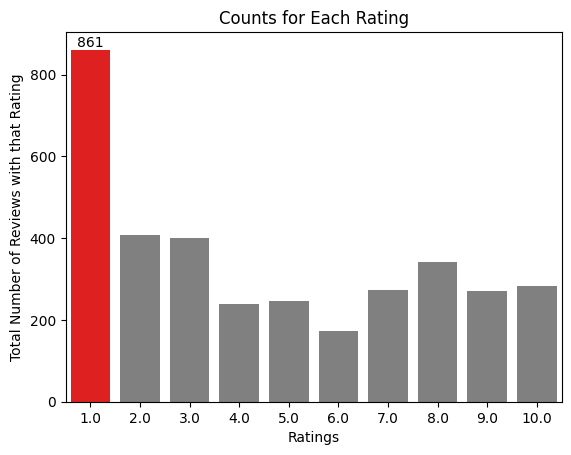

In [ ]:
# Determine colors for the bars
clrs = ['Red' if (x == max(df_ratings['count'])) else 'grey' for x in df_ratings['count']]

# Plotting the bar chart
ax = sns.barplot(x=df_ratings['rating'], y=df_ratings['count'], palette=clrs, errwidth=0)

# Adding labels to the bars
ax.bar_label(ax.containers[0])

# Setting the labels and title
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of Reviews with that Rating")
ax.set_title("Counts for Each Rating")

plt.show()


In [ ]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [20]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()


In [21]:
df_country_review.rename(columns={'index':'country','total_reviews':'country'}, inplace=True)


In [22]:
df_country_review

,country,count
0,United Kingdom,2165
1,United States,415
2,Australia,141
3,Canada,111
4,Germany,65


In [23]:
print(df_country_review.head(10))


          country  count
0  United Kingdom   2165
1   United States    415
2       Australia    141
3          Canada    111
4         Germany     65


Text(0.5, 1.0, 'Maximum number of review by country')

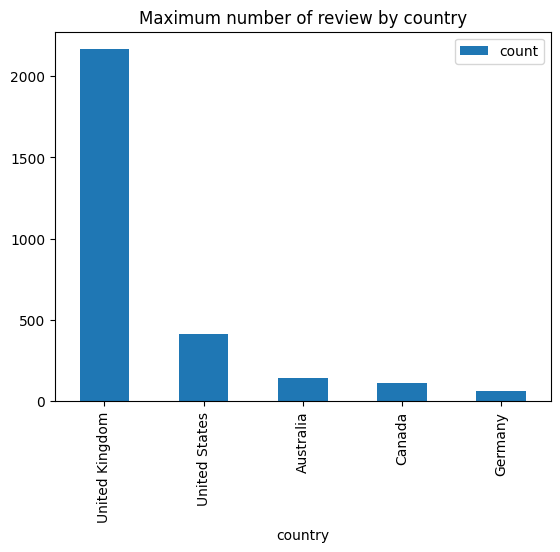

In [24]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

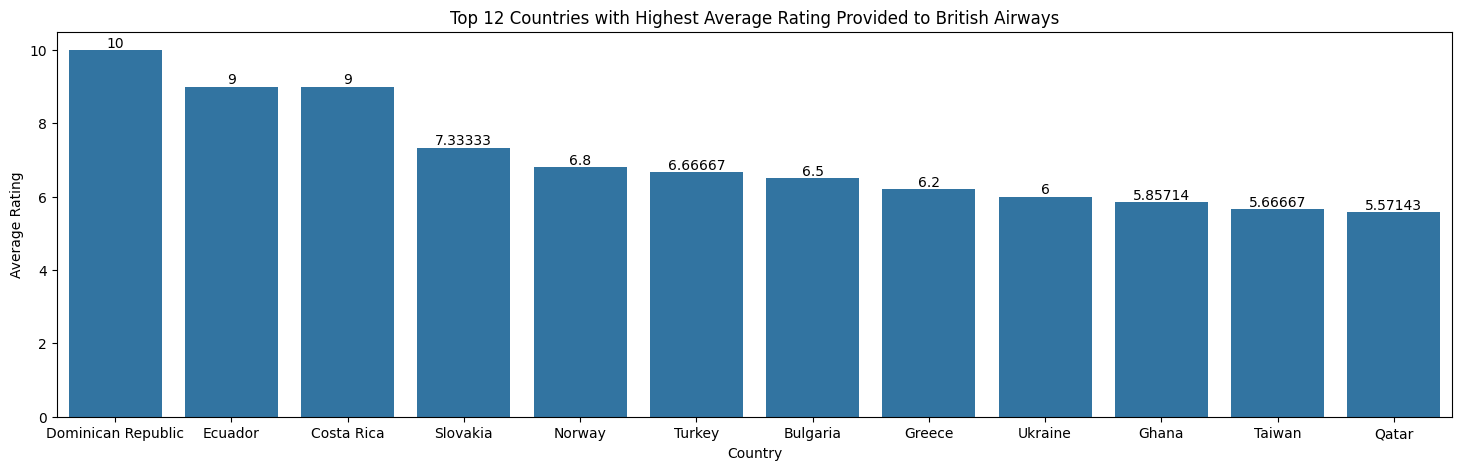

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'stars' column is numeric and handle non-numeric values
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

# Drop rows where 'stars' is NaN
df = df.dropna(subset=['stars'])

# Group by 'country' and calculate the mean of 'stars'
df_country_rating = df.groupby('country')['stars'].mean().sort_values(ascending=False).reset_index()

# Rename the column for better readability
df_country_rating.rename(columns={'stars': 'avg_rating'}, inplace=True)

# Plot the top 12 countries by average rating
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], ax=ax)
ax.set_title("Top 12 Countries with Highest Average Rating Provided to British Airways")
ax.set_xlabel("Country")
ax.bar_label(ax.containers[0])
ax.set_ylabel("Average Rating")
plt.show()


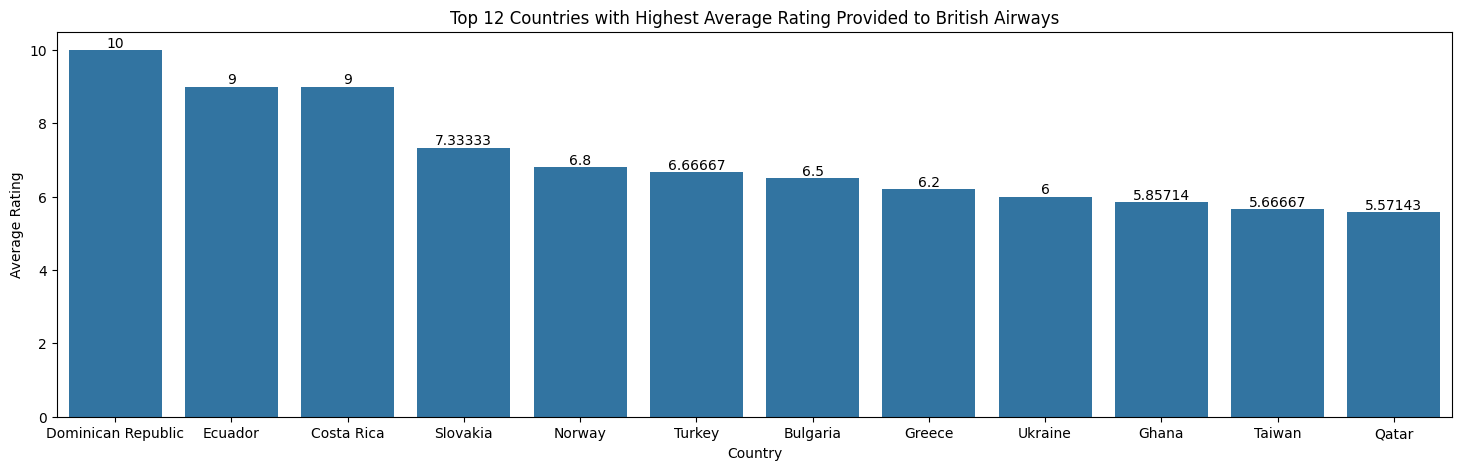

In [ ]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], ax=ax)
ax.set_title("Top 12 Countries with Highest Average Rating Provided to British Airways")
ax.set_xlabel("Country")
ax.bar_label(ax.containers[0])
ax.set_ylabel("Average Rating")
plt.show()


In [26]:

df.date = pd.to_datetime(df.date)
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

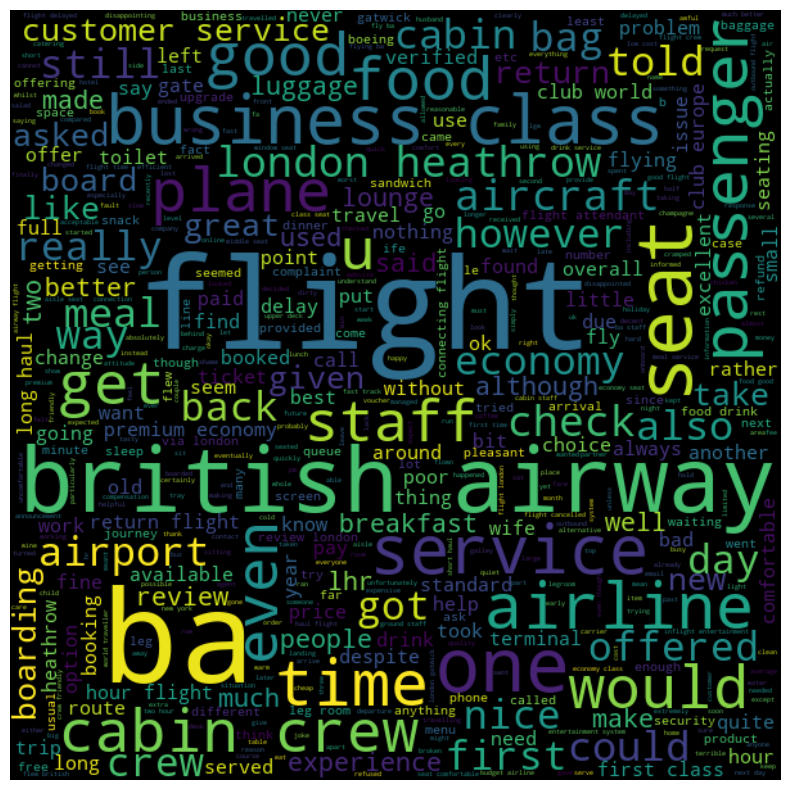

In [41]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

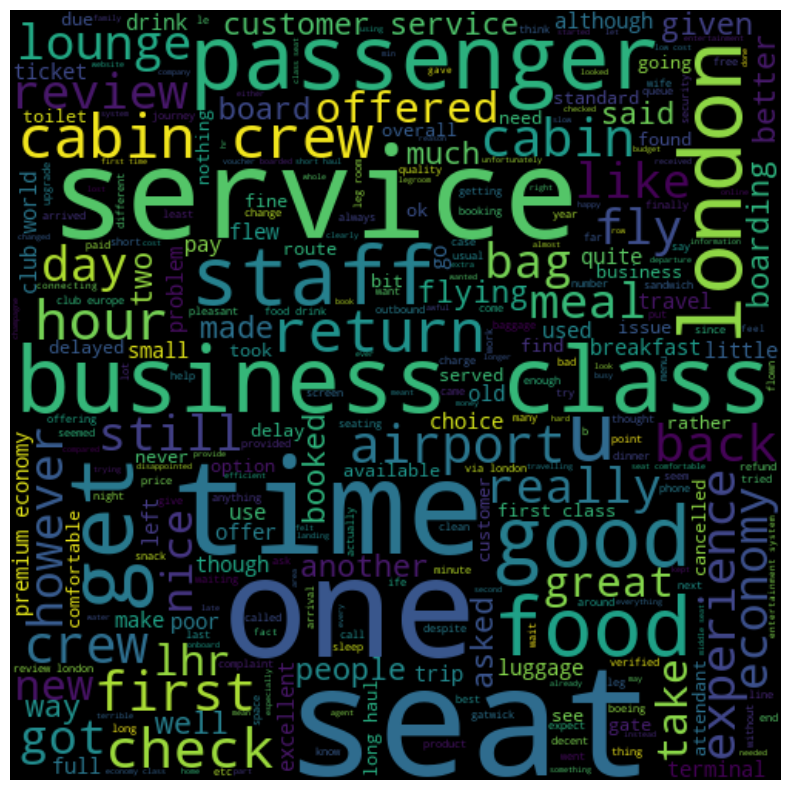

In [42]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

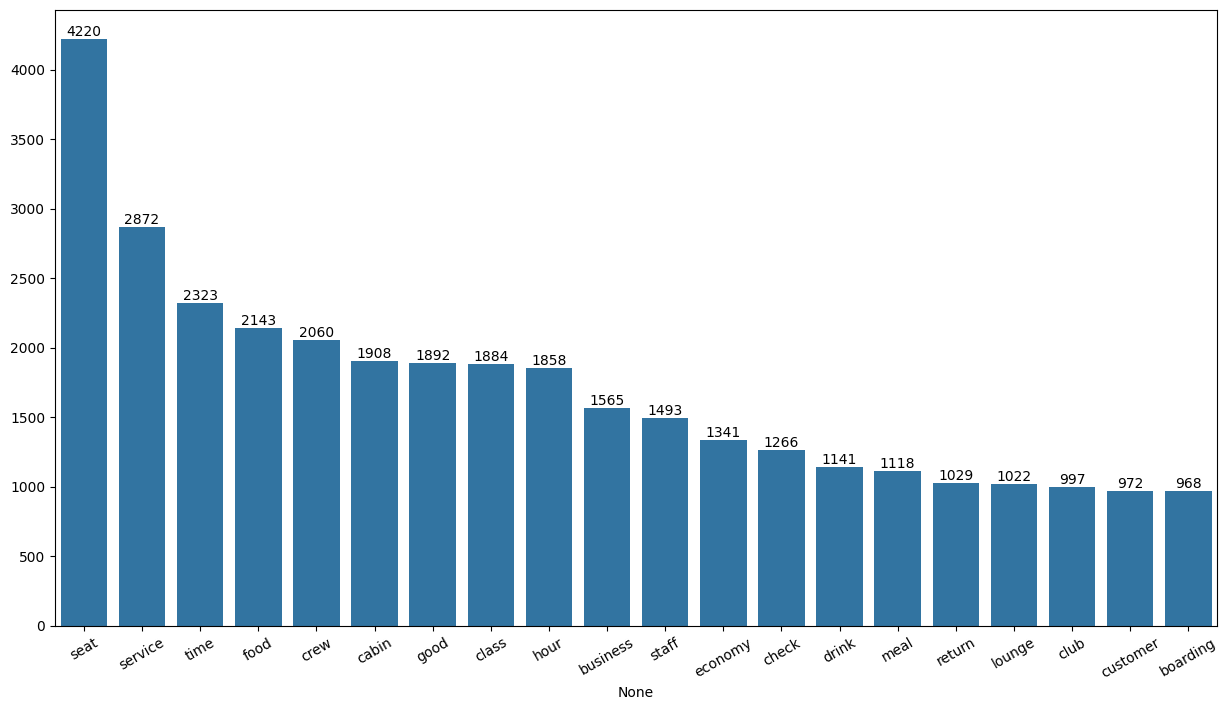

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'cabin'),
  Text(6, 0, 'good'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'customer'),
  Text(19, 0, 'boarding')])

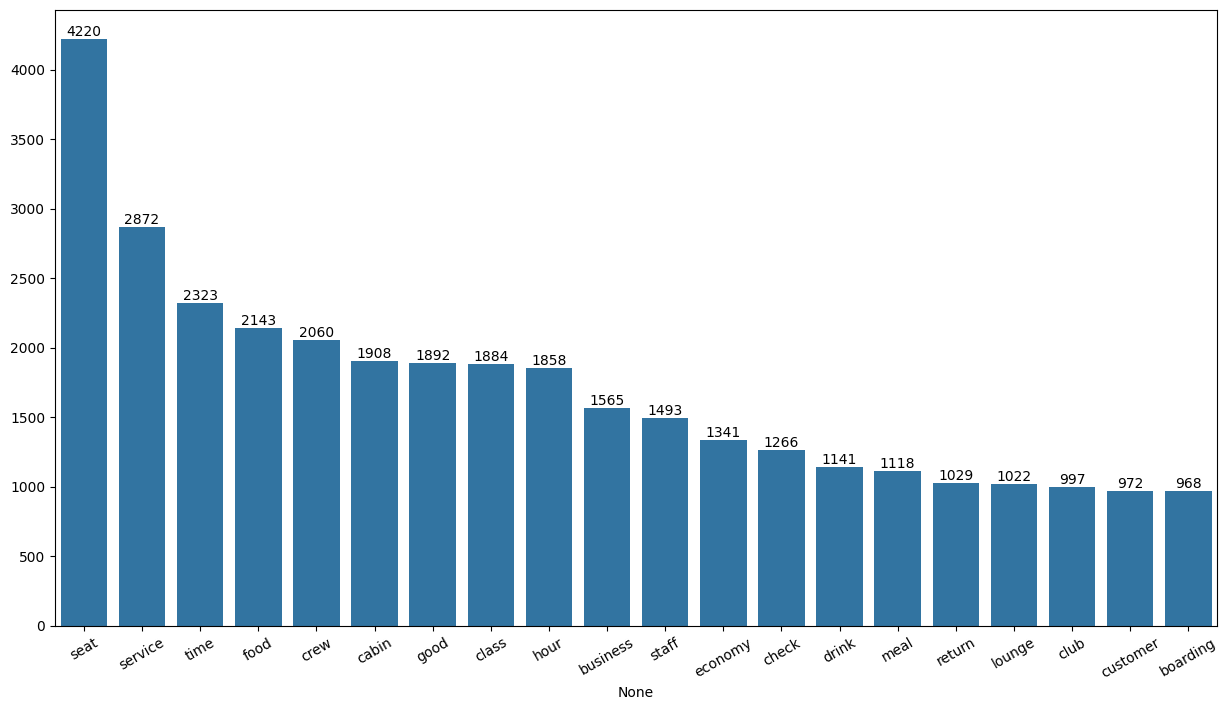

In [44]:
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

C:\Users\User\AppData\Local\Temp\ipykernel_9556\2495842620.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




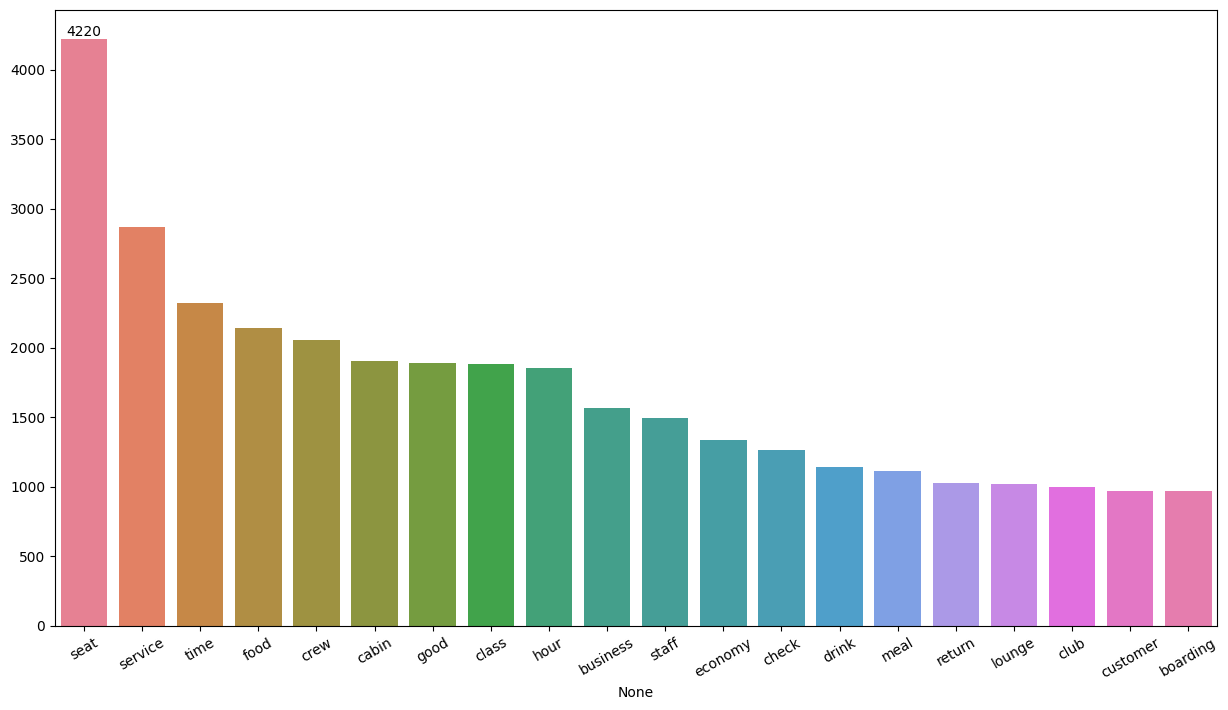

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom or built-in palette
palette = sns.color_palette("husl", len(all_fdist))  # "husl" is a colorful palette

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Seaborn bar plot with colorful bars
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette=palette)

# Add value labels to the bars
all_plot.bar_label(all_plot.containers[0])

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()


<Axes: >

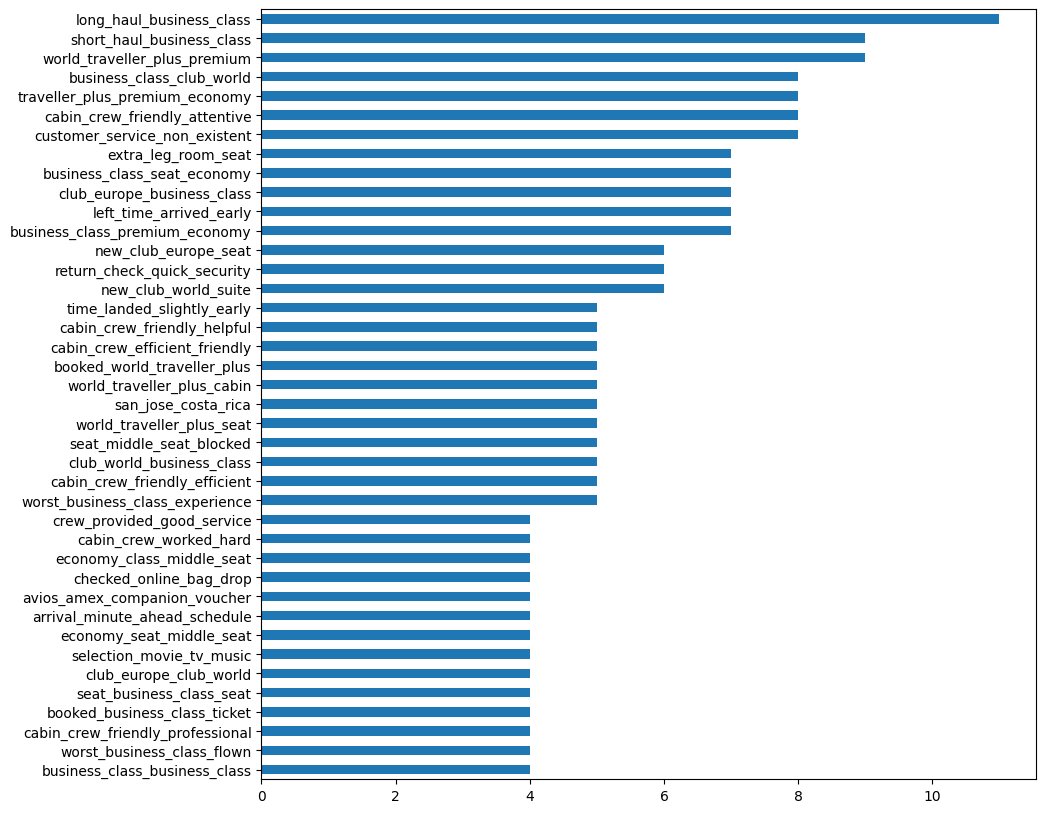

In [ ]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

<Axes: >

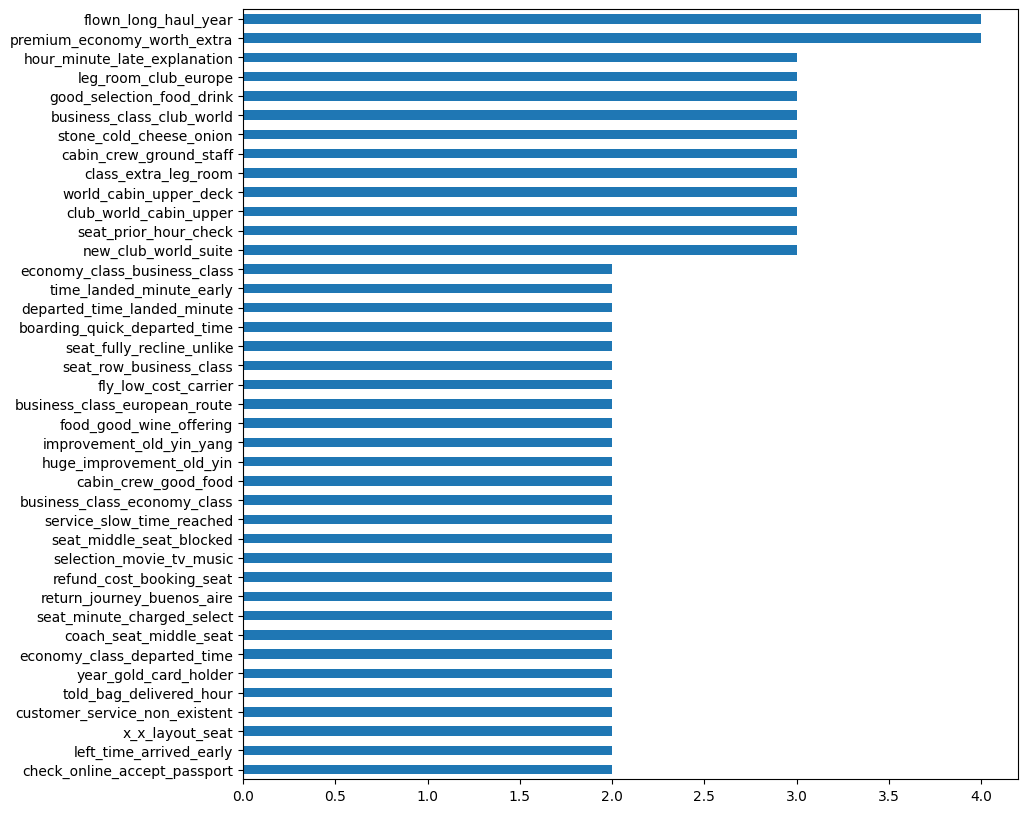

In [ ]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

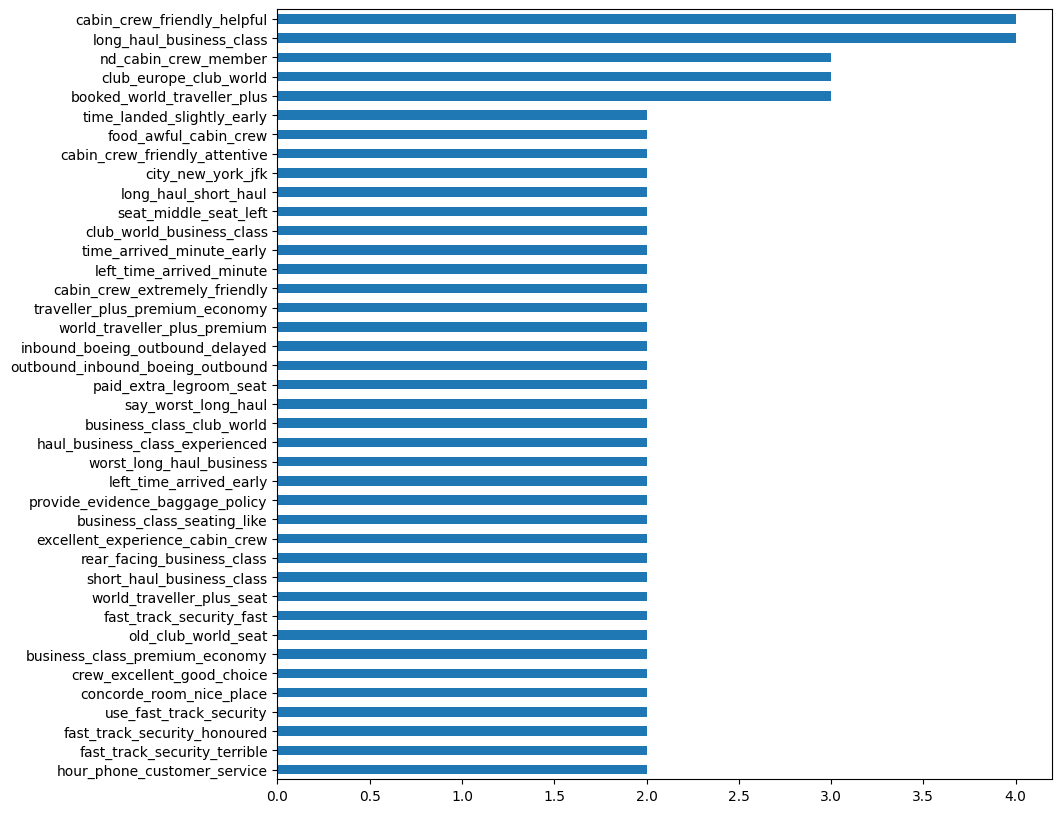

In [ ]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

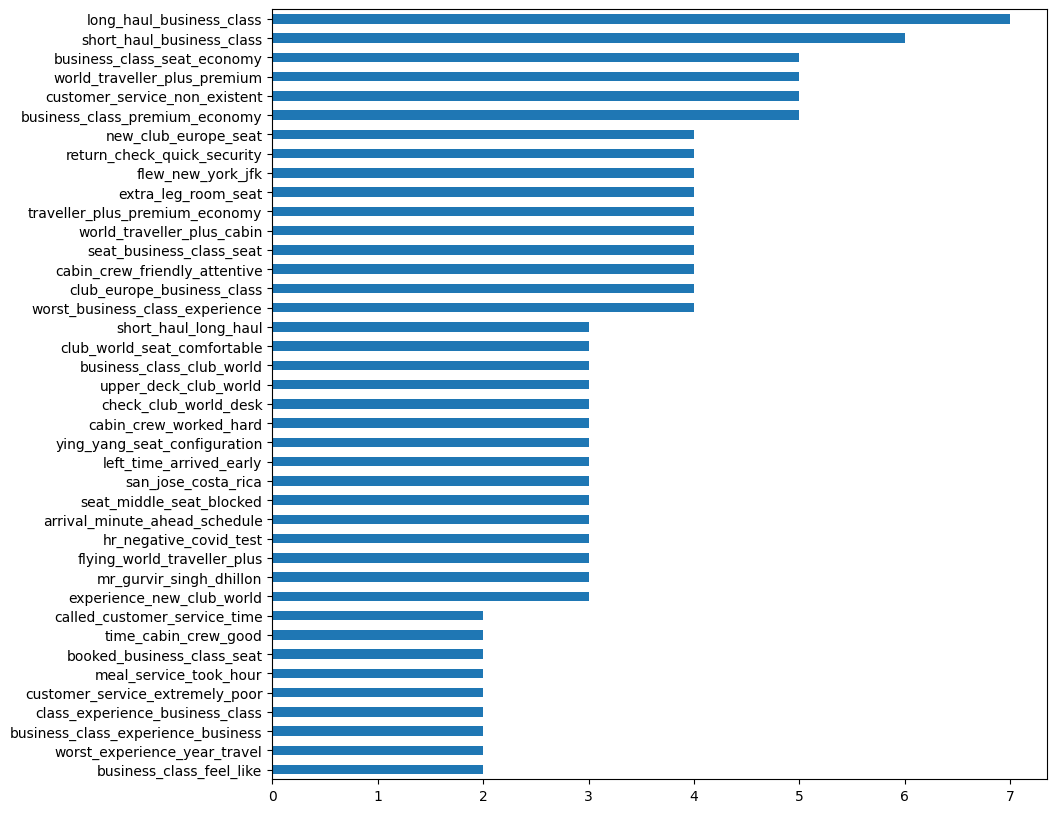

In [ ]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)

In [27]:
%%capture
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
df['polarity'] = 0

for i in range(len(df.corpus)):
    sent= TextBlob(df.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    df['polarity'][i] = polarity
# let's see how many texts are with positive comments



KeyError: 3302

In [29]:
print(f"{df[(df['polarity'] >-0.2) & (df['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{df[(df['polarity'] >-0.1) & (df['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

2486 number of reviews between -0.2 and 0.2 polarity score
1539 number of reviews between -0.1 and 0.1 polarity score


In [30]:
%%capture
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
df['label'] = 0
    
for i in range(len(df.corpus)):
    
    score = vds.polarity_scores(df.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

KeyError: 3302

In [31]:
df.label.value_counts()

label
 1    2042
-1    1142
 0     312
Name: count, dtype: int64

In [32]:

from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation


In [33]:
tf = vect.fit_transform(df.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [34]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [35]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,968.7,seat,1539.1,ba,203.0,desk,8.5,flight,3017.0,seat,590.1,flight,2886.1,seat,29.1
1,lounge,562.6,class,1069.3,flight,90.2,austin,7.1,ba,1566.9,economy,492.8,ba,1660.9,wife,13.8
2,crew,540.8,business,900.6,staff,82.8,wish,6.5,hour,1079.0,flight,261.2,seat,1436.5,senior,12.4
3,time,525.9,ba,700.0,passenger,64.0,queue,5.3,airway,912.9,service,250.7,good,1239.1,attendant,12.1
4,drink,502.5,flight,399.3,airline,53.8,cello,5.1,british,910.9,ba,250.0,crew,1211.9,hr,11.8
5,service,465.8,economy,391.3,customer,50.5,wouldnt,5.1,london,808.6,premium,243.2,food,1172.2,breakfast,10.9
6,good,430.3,airline,315.9,service,43.6,delightful,5.1,service,749.1,food,233.2,cabin,1161.8,male,8.5
7,ba,410.8,airway,310.6,year,39.2,working,4.7,time,746.5,cabin,200.3,service,1112.2,nightmare,7.6
8,meal,407.1,british,309.8,even,37.9,check,4.6,customer,745.6,get,159.8,time,885.3,aisle,7.4
9,food,394.7,one,271.8,review,32.6,thank,4.2,would,698.8,airway,149.2,london,863.3,singapore,7.4


In [36]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)


In [37]:
nmf.fit_transform(tf)

array([[0.        , 0.09223716],
       [0.17883807, 0.        ],
       [0.00636085, 0.01825908],
       ...,
       [0.04877445, 0.02261306],
       [0.10495495, 0.10987964],
       [0.0490308 , 0.02154332]])

In [38]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [39]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,seat,24.0,flight,20.5
1,ba,13.3,ba,7.2
2,class,11.0,hour,4.8
3,business,8.8,time,3.9
4,service,8.5,london,3.5
5,food,8.4,airway,3.4
6,cabin,8.1,british,3.4
7,crew,7.7,service,3.3
8,good,7.5,would,2.9
9,economy,6.6,day,2.6
